In [1]:
import requests
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
#from Portfolio_Object import *

pd.plotting.register_matplotlib_converters()

In [2]:
symbol = 'aapl'
fmp_Key = 'e7a0013660c8008c50031716b26e0bb6'
endpoint = f'https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/{symbol}?apikey={fmp_Key}'

data = requests.get(endpoint).json()
print(json.dumps(data, indent=4))

{
    "symbol": "AAPL",
    "historical": [
        {
            "date": "2022-02-04",
            "label": "February 04, 22",
            "adjDividend": 0.22,
            "dividend": 0.22,
            "recordDate": "2022-02-07",
            "paymentDate": "2022-02-10",
            "declarationDate": "2022-01-27"
        },
        {
            "date": "2021-11-05",
            "label": "November 05, 21",
            "adjDividend": 0.22,
            "dividend": 0.22,
            "recordDate": "2021-11-08",
            "paymentDate": "2021-11-11",
            "declarationDate": "2021-10-28"
        },
        {
            "date": "2021-08-06",
            "label": "August 06, 21",
            "adjDividend": 0.22,
            "dividend": 0.22,
            "recordDate": "2021-08-09",
            "paymentDate": "2021-08-12",
            "declarationDate": "2021-07-27"
        },
        {
            "date": "2021-05-07",
            "label": "May 07, 21",
            "adjDividend": 0.2

In [3]:
#Year-month-day
#date is actually the ex-dividend date, we want to buy a day before this as to get the dividend and then sell
ex_date = []
div_amount = []
for i in range(0, len(data['historical'])):
    ex_date.append(data['historical'][i]['date'])
    div_amount.append(data['historical'][i]['adjDividend'])

In [4]:
#This file uses the streaming api to gather useful information on stocks

#Future uses, make a loop that creates csv files for all stocks on the s&p 500 and create lstm models for each

#Daily price information
import time
import requests
from config import client_id
import pandas as pd
import numpy as np

stocks = pd.read_csv('List_of_s&p500.csv')

def date(year, month, day):
    #Takes date entered and returns the epoch time
    from datetime import date
    import time

    z = int(time.mktime(time.strptime(f'{year}-{month}-{day}', "%Y-%m-%d")))
    
    return z

symbol = "AAPL"
#For some odd reason there needs to be 3 more 0's for the TDAmeritrade api to properly collect this information

#May 25th, 2016
start_date = date(2017, 5, 8)
end_date = date(2022, 2, 18)

#Multiply epoch date to add 3 extra zero's
start_date, end_date = start_date*1000, end_date*1000

payload = {
    'apikey':client_id,
}

endpoint = f'https://api.tdameritrade.com/v1/marketdata/{symbol}/pricehistory?periodType=month&frequencyType=daily&startDate={start_date}&endDate={end_date}'

content = requests.get(url = endpoint, params = payload)

data = content.json()

my_columns = ['open','datetime','high', 'low','close','volume']
dataframe = pd.DataFrame(columns = my_columns)

#Creating a dictionary of lists
fields = {key: [] for key in my_columns}

#Iterates through the keys in the fields dictionary
#Date is arranged as (Year-Month-Day)
for key in fields:
    datetime_key = key
    if datetime_key == 'datetime':
        for i in range(0, len(data['candles'])):
            fields[f'{key}'].append(data["candles"][i][f'{key}'])
            epochtime = fields['datetime'][i]
            time_formatted = time.strftime('%Y-%m-%d', time.localtime(epochtime/1000))
            fields[f'{key}'][i] = time_formatted
    else:
        for i in range(0, len(data['candles'])):
            fields[f'{key}'].append(data["candles"][i][f'{key}'])

#Appends to the dataframe the dictionary of lists('fields')
dataframe = pd.DataFrame(fields)

#Adds the ticker symbol at front of the dataframe
dataframe.insert(loc=0, column='Ticker', value=f'{symbol}')

#Swaps the columns "open" and "date_time"
cols_rearranged = list(dataframe.columns)
a, b = cols_rearranged.index('open'), cols_rearranged.index('datetime')
cols_rearranged[b], cols_rearranged[a] = cols_rearranged[a], cols_rearranged[b]
dataframe = dataframe[cols_rearranged]

dataframe

,Ticker,datetime,open,high,low,close,volume
0,AAPL,2017-05-08,37.2575,38.4250,37.2575,38.2525,195009652
1,AAPL,2017-05-09,38.4675,38.7200,38.3625,38.4975,156521452
2,AAPL,2017-05-10,38.4075,38.4850,38.0275,38.3150,103222768
3,AAPL,2017-05-11,38.1125,38.5175,38.0775,38.4875,109020232
4,AAPL,2017-05-12,38.6750,39.1050,38.6675,39.0250,130108068
...,...,...,...,...,...,...,...
1202,AAPL,2022-02-14,167.3700,169.5800,166.5600,168.8800,86185530
1203,AAPL,2022-02-15,170.9700,172.9500,170.2500,172.7900,64286320
1204,AAPL,2022-02-16,171.8500,173.3400,170.0500,172.5500,61177398
1205,AAPL,2022-02-17,171.0300,171.9100,168.4700,168.8800,69589344


buy_signal = []
#Will need to shift the buy signal 1 place back as we need to buy before the exdividend date
for date in dataframe['datetime']:
    if date in ex_date:
        buy_signal.append(1)
    else:
        buy_signal.append(0)

In [5]:
# Reversing a list using reversed()
def Reverse(lst):
    return [ele for ele in reversed(lst)]

div_amount = Reverse(div_amount)

In [6]:
last_20_divamounts = div_amount[-20:]
last_20_divamounts

[0.1575,
 0.1575,
 0.1575,
 0.1575,
 0.1825,
 0.1825,
 0.1825,
 0.1825,
 0.1925,
 0.1925,
 0.1925,
 0.1925,
 0.205,
 0.205,
 0.205,
 0.205,
 0.22,
 0.22,
 0.22,
 0.22]

In [7]:
buy_or_sell = []
div_payout = []

for date in dataframe['datetime']:
    if date in ex_date:
        buy_or_sell.append(1)
    else:
        buy_or_sell.append(0)
dataframe['Buy'] = buy_or_sell

i=0
for signal in dataframe['Buy']:
    if i == 20:
        i-=1
    if signal == 0:
        div_payout.append(last_20_divamounts[i])
    elif signal == 1:
        div_payout.append(last_20_divamounts[i])
        i+=1
dataframe['Div_Payout'] = div_payout     

#Replacing values after 1 with -1 to indicate sell
for i in range(0, len(buy_or_sell)):
    if buy_or_sell[i] == 1:
        buy_or_sell[i+3] = -1
        
        
dataframe['Buy'] = buy_or_sell




In [8]:
dataframe

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout
0,AAPL,2017-05-08,37.2575,38.4250,37.2575,38.2525,195009652,0,0.1575
1,AAPL,2017-05-09,38.4675,38.7200,38.3625,38.4975,156521452,0,0.1575
2,AAPL,2017-05-10,38.4075,38.4850,38.0275,38.3150,103222768,0,0.1575
3,AAPL,2017-05-11,38.1125,38.5175,38.0775,38.4875,109020232,1,0.1575
4,AAPL,2017-05-12,38.6750,39.1050,38.6675,39.0250,130108068,0,0.1575
...,...,...,...,...,...,...,...,...,...
1202,AAPL,2022-02-14,167.3700,169.5800,166.5600,168.8800,86185530,0,0.2200
1203,AAPL,2022-02-15,170.9700,172.9500,170.2500,172.7900,64286320,0,0.2200
1204,AAPL,2022-02-16,171.8500,173.3400,170.0500,172.5500,61177398,0,0.2200
1205,AAPL,2022-02-17,171.0300,171.9100,168.4700,168.8800,69589344,0,0.2200


In [9]:
dataframeTestdays = dataframe.loc[dataframe['Buy'] == 1]
dataframeTestdays

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout
3,AAPL,2017-05-11,38.11250,38.5175,38.0775,38.4875,109020232,1,0.1575
66,AAPL,2017-08-10,39.97500,40.0000,38.6575,38.8300,163217092,1,0.1575
131,AAPL,2017-11-10,43.77750,43.8450,43.5675,43.6675,100582000,1,0.1575
192,AAPL,2018-02-09,39.26750,39.4725,37.5600,39.1025,282690432,1,0.1575
255,AAPL,2018-05-11,47.37250,47.5150,46.8625,47.1475,104848884,1,0.1825
318,AAPL,2018-08-10,51.84000,52.2750,51.6675,51.8825,98444808,1,0.1825
381,AAPL,2018-11-08,52.49500,52.5300,51.6875,52.1225,101450544,1,0.1825
442,AAPL,2019-02-08,42.24750,42.6650,42.1050,42.6025,95279864,1,0.1825
505,AAPL,2019-05-10,49.35475,49.7125,48.1925,49.2950,164834848,1,0.1925
568,AAPL,2019-08-09,50.32500,50.6900,49.8225,50.2475,98478984,1,0.1925


In [10]:
#Shifts buys one day before to capture the dividend eligibility date
dataframe['Buy'] = dataframe.Buy.shift(-3)

In [11]:
dataframe

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout
0,AAPL,2017-05-08,37.2575,38.4250,37.2575,38.2525,195009652,1.0,0.1575
1,AAPL,2017-05-09,38.4675,38.7200,38.3625,38.4975,156521452,0.0,0.1575
2,AAPL,2017-05-10,38.4075,38.4850,38.0275,38.3150,103222768,0.0,0.1575
3,AAPL,2017-05-11,38.1125,38.5175,38.0775,38.4875,109020232,-1.0,0.1575
4,AAPL,2017-05-12,38.6750,39.1050,38.6675,39.0250,130108068,0.0,0.1575
...,...,...,...,...,...,...,...,...,...
1202,AAPL,2022-02-14,167.3700,169.5800,166.5600,168.8800,86185530,0.0,0.2200
1203,AAPL,2022-02-15,170.9700,172.9500,170.2500,172.7900,64286320,0.0,0.2200
1204,AAPL,2022-02-16,171.8500,173.3400,170.0500,172.5500,61177398,NaN,0.2200
1205,AAPL,2022-02-17,171.0300,171.9100,168.4700,168.8800,69589344,NaN,0.2200


dataframe = dataframe.loc[dataframe['Buy'].shift() == 1, 'Buy'] = -1
dataframe

    

In [12]:
dataframe['Buy'] = dataframe['Buy'].fillna(0)
dataframe

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout
0,AAPL,2017-05-08,37.2575,38.4250,37.2575,38.2525,195009652,1.0,0.1575
1,AAPL,2017-05-09,38.4675,38.7200,38.3625,38.4975,156521452,0.0,0.1575
2,AAPL,2017-05-10,38.4075,38.4850,38.0275,38.3150,103222768,0.0,0.1575
3,AAPL,2017-05-11,38.1125,38.5175,38.0775,38.4875,109020232,-1.0,0.1575
4,AAPL,2017-05-12,38.6750,39.1050,38.6675,39.0250,130108068,0.0,0.1575
...,...,...,...,...,...,...,...,...,...
1202,AAPL,2022-02-14,167.3700,169.5800,166.5600,168.8800,86185530,0.0,0.2200
1203,AAPL,2022-02-15,170.9700,172.9500,170.2500,172.7900,64286320,0.0,0.2200
1204,AAPL,2022-02-16,171.8500,173.3400,170.0500,172.5500,61177398,0.0,0.2200
1205,AAPL,2022-02-17,171.0300,171.9100,168.4700,168.8800,69589344,0.0,0.2200


In [13]:
import datetime as dt
#Changes date into datetime object
dataframe['datetime'] =  pd.to_datetime(dataframe['datetime'], infer_datetime_format=True)

In [14]:
buy_signals = (dataframe['Buy'] == 1)
sell_signal = (dataframe['Buy'] == -1)

dataframe_buys = dataframe.loc[buy_signals]
dataframe_sells = dataframe.loc[sell_signal]

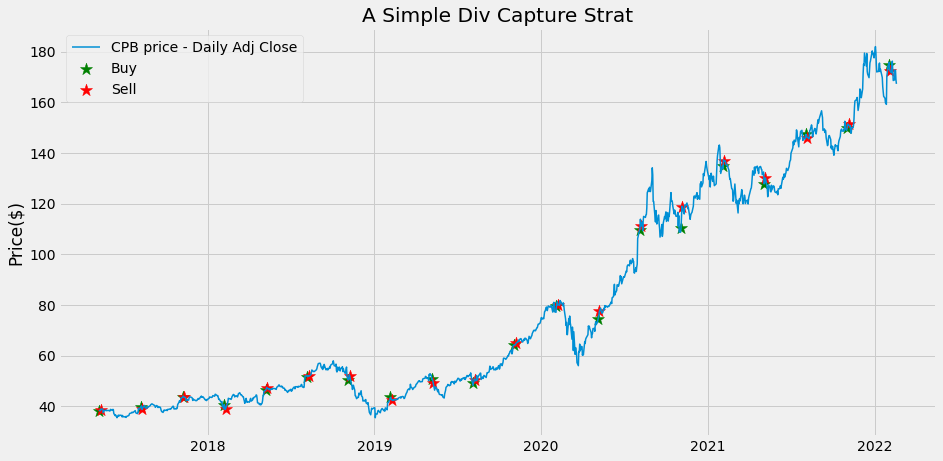

In [15]:
def plot_system1_sig(data, dataframe_buys, dataframe_sells):
    df = data.copy()
    dates = df['datetime']
    price = df['close']
    
    #Buy signal when  Position =1 and when the next is zero
    buy_marker = dataframe_buys['close']
    #Records the date
    buy_dates = dataframe_buys['datetime']
    

    sell_marker = dataframe_sells['close']
    sell_dates = dataframe_sells['datetime']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        
        plt.scatter(buy_dates, buy_marker, marker='*', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='*', color='red', s=160, label='Sell')
        
        plt.title("A Simple Div Capture Strat")
        plt.ylabel('Price($)')
        plt.legend()
        
plot_system1_sig(dataframe, dataframe_buys, dataframe_sells)    

In [16]:
dataframe

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout
0,AAPL,2017-05-08,37.2575,38.4250,37.2575,38.2525,195009652,1.0,0.1575
1,AAPL,2017-05-09,38.4675,38.7200,38.3625,38.4975,156521452,0.0,0.1575
2,AAPL,2017-05-10,38.4075,38.4850,38.0275,38.3150,103222768,0.0,0.1575
3,AAPL,2017-05-11,38.1125,38.5175,38.0775,38.4875,109020232,-1.0,0.1575
4,AAPL,2017-05-12,38.6750,39.1050,38.6675,39.0250,130108068,0.0,0.1575
...,...,...,...,...,...,...,...,...,...
1202,AAPL,2022-02-14,167.3700,169.5800,166.5600,168.8800,86185530,0.0,0.2200
1203,AAPL,2022-02-15,170.9700,172.9500,170.2500,172.7900,64286320,0.0,0.2200
1204,AAPL,2022-02-16,171.8500,173.3400,170.0500,172.5500,61177398,0.0,0.2200
1205,AAPL,2022-02-17,171.0300,171.9100,168.4700,168.8800,69589344,0.0,0.2200


In [17]:
def portfolio_input():
    global portfolio_size
    portfolio_size = float(input("Enter the value of your portfolio:"))

    try:
        val = float(portfolio_size)
    except ValueError:
        print("That's not a number! \n Try again:")
        portfolio_size = float(input("Enter the value of your portfolio: "))

In [18]:
portfolio_input()

Enter the value of your portfolio:1000000


In [19]:
import math
#Tells system to use 10% of the portfolio to buy stocks on the day before the ex-dividend
for row in dataframe.index:
    if dataframe.loc[row, 'Buy'] == 1:
        #There are two variables that are equal 
        dataframe.loc[row, 'Number of Shares to Buy'] = sell_amount = math.floor(((portfolio_size*.1)*dataframe.loc[row,'Buy'])/dataframe.loc[row,'close'])
    if dataframe.loc[row, 'Buy'] == -1:
        dataframe.loc[row, 'Number of Shares to Buy'] = sell_amount*(-1)
        
dataframe['Number of Shares to Buy'] = dataframe['Number of Shares to Buy'].fillna(0)
dataframe

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout,Number of Shares to Buy
0,AAPL,2017-05-08,37.2575,38.4250,37.2575,38.2525,195009652,1.0,0.1575,2614.0
1,AAPL,2017-05-09,38.4675,38.7200,38.3625,38.4975,156521452,0.0,0.1575,0.0
2,AAPL,2017-05-10,38.4075,38.4850,38.0275,38.3150,103222768,0.0,0.1575,0.0
3,AAPL,2017-05-11,38.1125,38.5175,38.0775,38.4875,109020232,-1.0,0.1575,-2614.0
4,AAPL,2017-05-12,38.6750,39.1050,38.6675,39.0250,130108068,0.0,0.1575,0.0
...,...,...,...,...,...,...,...,...,...,...
1202,AAPL,2022-02-14,167.3700,169.5800,166.5600,168.8800,86185530,0.0,0.2200,0.0
1203,AAPL,2022-02-15,170.9700,172.9500,170.2500,172.7900,64286320,0.0,0.2200,0.0
1204,AAPL,2022-02-16,171.8500,173.3400,170.0500,172.5500,61177398,0.0,0.2200,0.0
1205,AAPL,2022-02-17,171.0300,171.9100,168.4700,168.8800,69589344,0.0,0.2200,0.0


In [20]:
dataframe_ProfitCheck = dataframe.loc[dataframe['Buy'] != 0]
dataframe_ProfitCheck

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout,Number of Shares to Buy
0,AAPL,2017-05-08,37.25750,38.425000,37.257500,38.2525,195009652,1.0,0.1575,2614.0
3,AAPL,2017-05-11,38.11250,38.517500,38.077500,38.4875,109020232,-1.0,0.1575,-2614.0
63,AAPL,2017-08-07,39.26500,39.730000,39.167525,39.7025,87481284,1.0,0.1575,2518.0
66,AAPL,2017-08-10,39.97500,40.000000,38.657500,38.8300,163217092,-1.0,0.1575,-2518.0
128,AAPL,2017-11-07,43.47750,43.812500,43.400000,43.7025,97445940,1.0,0.1575,2288.0
131,AAPL,2017-11-10,43.77750,43.845000,43.567500,43.6675,100582000,-1.0,0.1575,-2288.0
189,AAPL,2018-02-06,38.70750,40.930000,38.500000,40.7575,272975352,1.0,0.1575,2453.0
192,AAPL,2018-02-09,39.26750,39.472500,37.560000,39.1025,282690432,-1.0,0.1575,-2453.0
252,AAPL,2018-05-08,46.24750,46.555000,45.916250,46.5125,113611108,1.0,0.1825,2149.0
255,AAPL,2018-05-11,47.37250,47.515000,46.862500,47.1475,104848884,-1.0,0.1825,-2149.0


In [21]:
for row in dataframe_ProfitCheck.index:
    #if buy column is 1, buy shares
    if dataframe_ProfitCheck.loc[row, 'Buy'] == 1:
        #There are two variables that are equal 
        dataframe_ProfitCheck.loc[row, 'Cost/Profit'] = (dataframe_ProfitCheck.loc[row,'Number of Shares to Buy']*dataframe_ProfitCheck.loc[row,'close'])*(-1)
    #If buy column is negative, sell shares and add dividend
    else: 
        dataframe_ProfitCheck.loc[row, 'Cost/Profit'] = ((dataframe_ProfitCheck.loc[row,'Number of Shares to Buy']*dataframe_ProfitCheck.loc[row,'close'])*(-1)) + ((-1)*(dataframe_ProfitCheck.loc[row,'Number of Shares to Buy']*dataframe_ProfitCheck.loc[row,'Div_Payout']))
        print(dataframe_ProfitCheck.loc[row, 'Cost/Profit'])

101018.03
98170.52500000001
100271.59999999999
96304.78
101712.17000000001
100537.515
103773.12000000001
98234.36
97539.8625
102393.2
101022.65000000001
100570.79999999999
104479.2
101410.24250000001
107599.97499999999
101354.09999999999
101996.26
99232.07999999999
100899.0
98732.91999999998


C:\Users\pauln\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\pauln\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
dataframe_ProfitCheck

,Ticker,datetime,open,high,low,close,volume,Buy,Div_Payout,Number of Shares to Buy,Cost/Profit
0,AAPL,2017-05-08,37.25750,38.425000,37.257500,38.2525,195009652,1.0,0.1575,2614.0,-99992.0350
3,AAPL,2017-05-11,38.11250,38.517500,38.077500,38.4875,109020232,-1.0,0.1575,-2614.0,101018.0300
63,AAPL,2017-08-07,39.26500,39.730000,39.167525,39.7025,87481284,1.0,0.1575,2518.0,-99970.8950
66,AAPL,2017-08-10,39.97500,40.000000,38.657500,38.8300,163217092,-1.0,0.1575,-2518.0,98170.5250
128,AAPL,2017-11-07,43.47750,43.812500,43.400000,43.7025,97445940,1.0,0.1575,2288.0,-99991.3200
131,AAPL,2017-11-10,43.77750,43.845000,43.567500,43.6675,100582000,-1.0,0.1575,-2288.0,100271.6000
189,AAPL,2018-02-06,38.70750,40.930000,38.500000,40.7575,272975352,1.0,0.1575,2453.0,-99978.1475
192,AAPL,2018-02-09,39.26750,39.472500,37.560000,39.1025,282690432,-1.0,0.1575,-2453.0,96304.7800
252,AAPL,2018-05-08,46.24750,46.555000,45.916250,46.5125,113611108,1.0,0.1825,2149.0,-99955.3625
255,AAPL,2018-05-11,47.37250,47.515000,46.862500,47.1475,104848884,-1.0,0.1825,-2149.0,101712.1700


In [23]:
profit = 0
for row in dataframe_ProfitCheck.index:
    profit += (dataframe_ProfitCheck.loc[row,'Cost/Profit'])


In [24]:
profit

18138.907499999885